Model Accuracy: 0.50


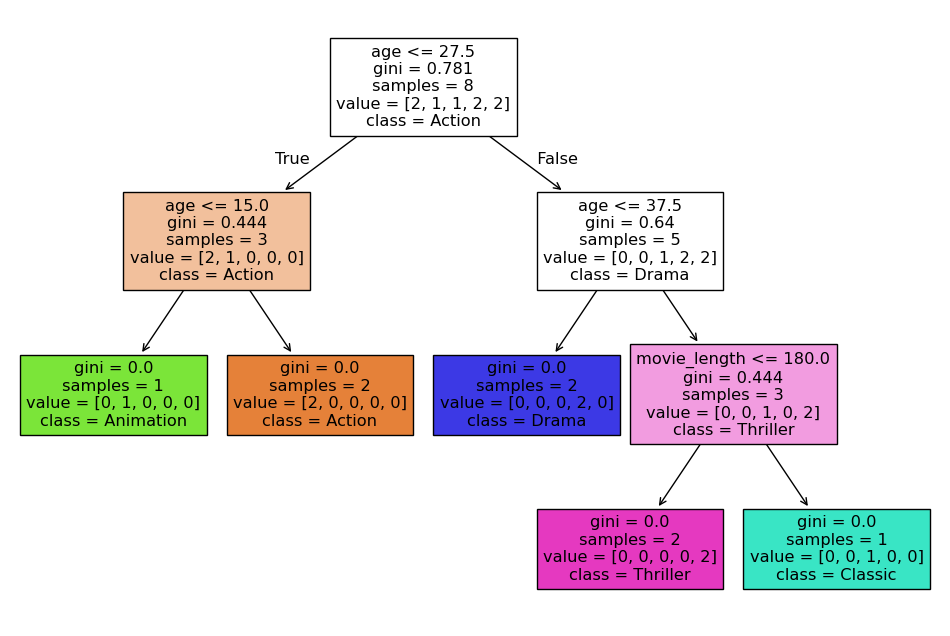

In [51]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import joblib
import matplotlib.pyplot as plt

# import dataset
movie_data = pd.read_csv('data/movie.csv')

# separate features (X) and target variable (y)
X = movie_data.drop(columns=['genre'])
y = movie_data['genre']

# split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create model
model = DecisionTreeClassifier()

# train model using the training data
model.fit(X_train, y_train)

# make predictions on the test set
predictions = model.predict(X_test)

# calculate model accuracy based on test data
accuracy = accuracy_score(y_test, predictions)

# save trained model
joblib.dump(model, 'models/movie_recommender.joblib')

# display accuracy
print(f"Model Accuracy: {accuracy:.2f}")

# visualise decision tree
plt.figure(figsize=(12, 8)) # set figure size for readability
plot_tree(model, feature_names=X.columns, 
          class_names=sorted(y.unique()), 
          filled=True)
plt.show()

# export decision tree to .dot file for Graphviz
tree.export_graphviz(model, out_file='visualisations/movie_recommender.dot',
                     feature_names=['age', 'movie_length'], # feature names used in tree
                     class_names=sorted(y.unique()), # labels for predicted classes
                     label ='all', # display labels on all nodes
                     rounded=True, # use rounded corners
                     filled=True) # fill nodes with colours

In [47]:
# load saved model
model = joblib.load('models/movie_recommender.joblib')

# define feature names
feature_names = X.columns

# create a sample input for prediction
input_data = pd.DataFrame([[21, 100]], columns=feature_names)

# make prediction
prediction = model.predict(input_data)
print(f"Predicted Genre: {prediction[0]}")

Predicted Genre: Animation
